In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
file = '프로랜서tv.json' # Youtube로부터 8/3일 데이터 읽어옴
data = None
with open(file, 'r') as f:
    data=json.load(f)

channel_id, stats = data.popitem()

print(channel_id, '누적뷰: ' + stats['channel_statistics']['viewCount'], 
      '가입자수: ' + stats['channel_statistics']['subscriberCount'] )

UCeqArGCCdgsPxYaWndH_L-Q 누적뷰: 1867450 가입자수: 20100


In [3]:
video_stats = stats['video_data']

In [4]:
video_data = []
for vid in video_stats.items():
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    dislikes = int(vid[1]['dislikeCount'])
    # comments = int(vid[1]['commentCount'])
    release = vid[1]['publishedAt']
    video_data.append([title, views, likes, dislikes, release])

In [5]:
video = pd.DataFrame(video_data, columns=['title','viewCount', 'likeCount', 'dislikeCount', 'release'])
video['release'] = video['release'].apply(lambda x: x[:10])

In [6]:
video.set_index('title', inplace=True)

In [7]:
video.sort_values(by='viewCount', ascending=False)

video['release'] = pd.to_datetime(video['release'])

## 조회수 기준 상위 30 동영상 제목

In [8]:
video.sort_values('viewCount', ascending=False).head(30) 

,viewCount,likeCount,dislikeCount,release
title,,,,
우드 잘치는법 ( 절대하면안되는 두가지 // 꼭지켜야할 세가지 ),425602,3355,131,2020-05-14
골프 스윙 힘빼는 방법 [ 장원주 프로의 12년 걸린 힘빼기 노하우 공개! ],294621,3289,124,2020-04-23
뒷땅 & 탑볼이 나는 이유 [ 이것만 조심하셔도 80%는 예방할 수 있어요!! ],252639,3164,111,2020-05-22
[드라이버 비거리] 10분만에 20야드 증가 가능??,151696,1810,78,2020-07-02
뒷땅을 치는 이유 뒷땅 방지법 하루1분연습법,134711,1639,41,2020-02-02
야근보다 더 무서운 생크 치료받고 가세요!,117199,1554,36,2020-05-26
슬라이스 교정 슬라이스 방지법 이게 안바뀌면 절대 못 고칩니다!,68570,1183,19,2020-01-26
[이쁜스윙] 프로처럼 이쁜스윙 당신도 할 수 있어요,45665,643,19,2020-07-06
다운스윙 ( 엎어치는 분들을 위한 두가지 솔루션! ),32082,409,7,2020-06-07


In [9]:
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
video['viewCount/day'] = video['viewCount/day'].astype('int')

## 일평균 조회수 기준 상위 30위 (등록일 보정)

In [10]:
video.sort_values('viewCount/day', ascending=False).head(30) 

,viewCount,likeCount,dislikeCount,release,viewCount/day
title,,,,,
우드 잘치는법 ( 절대하면안되는 두가지 // 꼭지켜야할 세가지 ),425602,3355,131,2020-05-14,5254
[드라이버 비거리] 10분만에 20야드 증가 가능??,151696,1810,78,2020-07-02,4740
뒷땅 & 탑볼이 나는 이유 [ 이것만 조심하셔도 80%는 예방할 수 있어요!! ],252639,3164,111,2020-05-22,3460
골프 스윙 힘빼는 방법 [ 장원주 프로의 12년 걸린 힘빼기 노하우 공개! ],294621,3289,124,2020-04-23,2888
[ 몸통스윙 하니까 슬라이스 나는데요?? ],16419,225,6,2020-07-26,2052
"[골프회전] 올바른 골프 턴(회전) 체크하는 법, 골프 회전(턴) 할때 힘 주는 방법 공개",25666,490,10,2020-07-21,1974
[구독자레슨] 이벤트 당첨자 분에게 두명의 프로가 레슨 해드렸어요,5348,106,1,2020-07-31,1782
야근보다 더 무서운 생크 치료받고 가세요!,117199,1554,36,2020-05-26,1698
[이쁜스윙] 프로처럼 이쁜스윙 당신도 할 수 있어요,45665,643,19,2020-07-06,1630


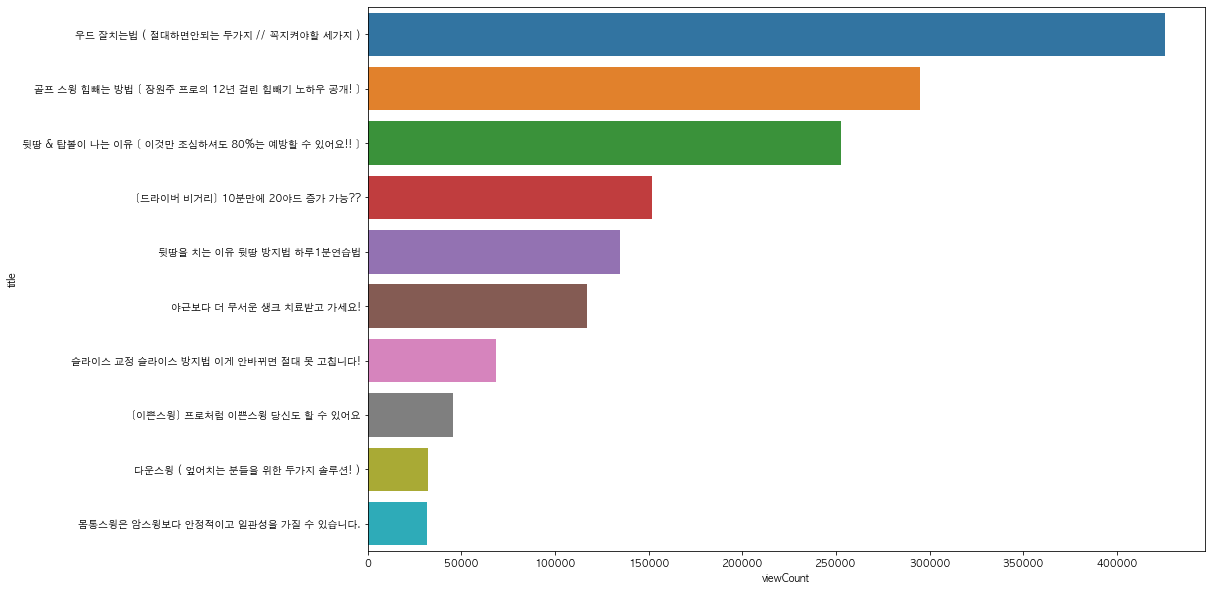

In [11]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount', y='title', data=video_reset_index.sort_values('viewCount', ascending=False)[:10])

In [12]:
df = video.reset_index()
df = df[['title', 'viewCount']].sort_values('viewCount', ascending=False)

In [13]:
import re
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [14]:
sentences = df['refined'].values
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.133 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 93
all accessor variety was computed # words = 93


In [15]:
from soynlp.tokenizer import LTokenizer
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [16]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [17]:
#20% 
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [18]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)

In [19]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 채널별 상위 20%에 많이 등장하는 단어

In [20]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

뒷땅 2
이유 2
수 2
있어요 2
방지법 2
슬라이스 2
이쁜스윙 2
우드 1
잘치는법 1
절대하면안되는 1
두가지 1
꼭지켜야할 1
세가지 1
골프 1
스윙 1
힘빼는 1
방법 1
장원주 1
프로의 1
12년 1
걸린 1
힘빼기 1
노하우 1
공개 1
탑볼이 1
나는 1
이것만 1
조심하셔도 1
80는 1
예방할 1
드라이버 1
비거리 1
10분만에 1
20야드 1
증가 1
가능 1
뒷땅을 1
치는 1
하루1분연습법 1
야근보다 1
더 1
무서운 1
생크 1
치료받고 1
가세요 1
교정 1
이게 1
안바뀌면 1
절대 1
못 1
고칩니다 1
프로처럼 1
당신도 1
할 1
